# Prognosis Disease Symptoms

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [58]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Prognosis Disease Symptoms/test_disease.csv")

In [59]:
data.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD


## Train And Test Modele

In [61]:
# Split the data into features and target
X = data.drop('prognosis', axis=1)
y = data['prognosis']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


x = data.loc[:, ~data.columns.str.contains('^Unnamed')]
y = data.loc[:, ~data.columns.str.contains('^Unnamed')]



## Random Forest Classification

In [85]:
# Split the data into features and target
X = data.drop('prognosis', axis=1)
y = data['prognosis']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Validation Accuracy: 0.00


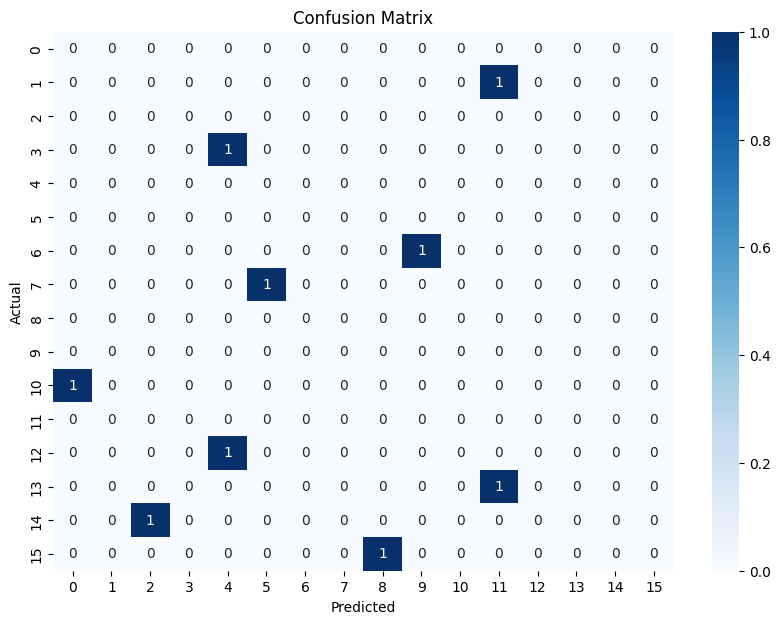

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00       0.0
                            Common Cold       0.00      0.00      0.00       1.0
                              Diabetes        0.00      0.00      0.00       0.0
                          Drug Reaction       0.00      0.00      0.00       1.0
                       Fungal infection       0.00      0.00      0.00       0.0
                                   GERD       0.00      0.00      0.00       0.0
                        Gastroenteritis       0.00      0.00      0.00       1.0
                           Heart attack       0.00      0.00      0.00       1.0
                            Hepatitis D       0.00      0.00      0.00       0.0
                                Malaria       0.00      0.00      0.00       0.0
           Paralysis (brain hemorrhage)       0.00      0.00      0.00       1.0
                           

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predict on the validation set
y_pred = rf_clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

## Decision Tree Classification

In [82]:
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=3)

Validation Accuracy: 0.00


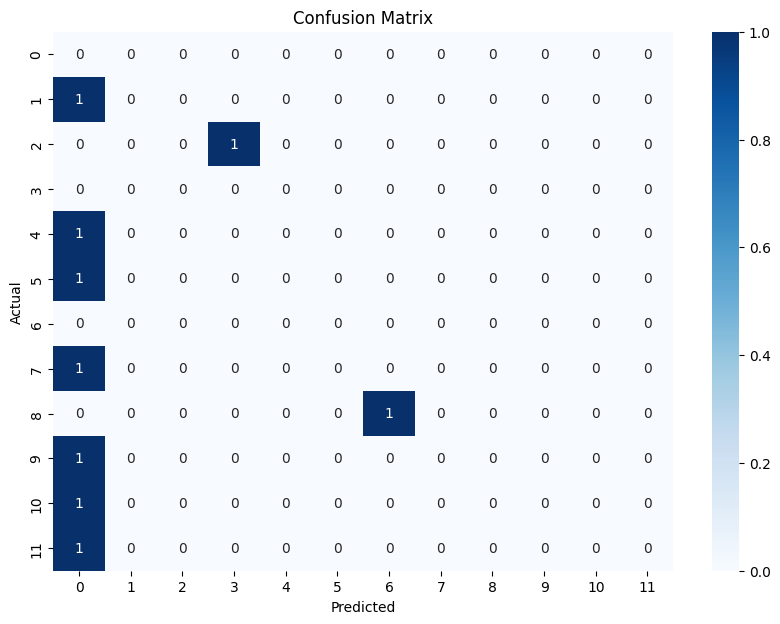

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00       0.0
                            Common Cold       0.00      0.00      0.00       1.0
                          Drug Reaction       0.00      0.00      0.00       1.0
                       Fungal infection       0.00      0.00      0.00       0.0
                        Gastroenteritis       0.00      0.00      0.00       1.0
                           Heart attack       0.00      0.00      0.00       1.0
                               Impetigo       0.00      0.00      0.00       0.0
           Paralysis (brain hemorrhage)       0.00      0.00      0.00       1.0
                              Psoriasis       0.00      0.00      0.00       1.0
                           Tuberculosis       0.00      0.00      0.00       1.0
                         Varicose veins       0.00      0.00      0.00       1.0
                           

In [80]:
# Predict on the validation set
y_pred = dec_clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))